# Analysis of the di-muon spectrum using data from the CMS detector

(the exercise was inspired by a similar pseudo-analysis on different data samples https://github.com/cms-opendata-analyses/DimuonSpectrumNanoAODOutreachAnalysis)

This analysis takes data from the CMS experiment recorded in 2012 during Run B and C, as described in README file, and extracts the di-muon spectrum. The di-muon spectrum is computed from the data by calculating the invariant mass of muon pairs with opposite charge. In the resulting plot, the particle resonances in a wide energy range from the [eta meson](https://en.wikipedia.org/wiki/Eta_meson) at about 548 MeV up to the [Z boson](https://en.wikipedia.org/wiki/W_and_Z_bosons) at about 91 GeV can be rediscovered.

Note that the bump at 30 GeV is not a resonance but an effect of the data taking due to the used trigger. The technical description of the dataset can be found in the respective record linked below.

The result of this analysis can be compared with [an official result of the CMS collaboration using data taken in 2010](https://cds.cern.ch/record/1456510), see the plot below:

![](http://cds.cern.ch/record/1456510/files/pictures_samples_dimuonSpectrum_40pb-1_mod-combined.png)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tarfile

In [ ]:
!wget https://zenodo.org/record/5345875/files/DataFiles_csv.tar.gz

--2022-02-06 14:42:00--  https://zenodo.org/record/5345875/files/DataFiles_csv.tar.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3179929585 (3.0G) [application/octet-stream]
Saving to: ‘DataFiles_csv.tar.gz’

DataFiles_csv.tar.g 100%[===================>]   2.96G  4.93MB/s    in 9m 27s  

2022-02-06 14:51:29 (5.35 MB/s) - ‘DataFiles_csv.tar.gz’ saved [3179929585/3179929585]



In [ ]:
# in case you want to conduct an analysis on a larger sample - these steps were needed to obtain the samples:
# !wget https://zenodo.org/record/5345875/files/DataFiles_csv.tar.gz
# stop the execution after a few files - the statistics is large enough to be used in further calculations
# !tar xvzf DataFiles_csv.tar.gz

files_i_want = ['csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20000_07.csv', 'csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20000_17.csv',
                'csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20001_18.csv', 'csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20001_11.csv'
                ]

tar = tarfile.open("DataFiles_csv.tar.gz")
tar.extractall(members=[x for x in tar.getmembers() if x.name in files_i_want])

In [ ]:
# reading the dataframes
df_20000_07 = pd.read_csv('csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20000_07.csv')
df_20000_17 = pd.read_csv('csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20000_17.csv')
df_20001_18 = pd.read_csv('csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20001_18.csv')
df_20001_11 = pd.read_csv('csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20001_11.csv')

df = pd.concat([df_20000_07, df_20000_17, df_20001_18, df_20001_11])

In [ ]:
df.head(10)

,entry,subentry,run,luminosityBlock,event,HLT_Dimuon10_Jpsi,HLT_Dimuon5_PsiPrime,HLT_Dimuon8_Jpsi,HLT_Dimuon9_PsiPrime,HLT_DoubleMu11_Acoplanarity03,HLT_DoubleMu3p5_LowMassNonResonant_Displaced,HLT_DoubleMu3p5_LowMass_Displaced,HLT_DoubleMu4_Acoplanarity03,HLT_DoubleMu5_IsoMu5,HLT_L2DoubleMu23_NoVertex,HLT_L2DoubleMu23_NoVertex_2Cha_Angle2p5,HLT_L2DoubleMu38_NoVertex_2Cha_Angle2p5,HLT_Mu13_Mu8,HLT_Mu13_Mu8_NoDZ,HLT_Mu17,HLT_Mu17_Mu8,HLT_Mu17_TkMu8,HLT_Mu17_TkMu8_NoDZ,HLT_Mu22_TkMu22,HLT_Mu22_TkMu8,HLT_Mu8,HLT_TripleMu5,PV_npvs,PV_x,PV_y,PV_z,nMuon,Muon_pt,Muon_eta,Muon_phi,Muon_mass,Muon_charge,Muon_pfRelIso03_all,Muon_pfRelIso04_all,Muon_tightId,Muon_softId,Muon_dxy,Muon_dxyErr,Muon_dz,Muon_dzErr,Muon_jetIdx,Muon_genPartIdx
0,0,0,195113,520,610174206,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,13,0.073731,0.061803,3.753879,2,14.819695,-2.196960,-1.635349,0.105658,-1,1.137804,1.319168,True,True,0.010309,0.003798,0.020990,0.009571,-1,-1
1,0,1,195113,520,610174206,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,13,0.073731,0.061803,3.753879,2,3.606570,0.979537,0.658010,0.105658,-1,0.285024,0.383009,False,True,-0.005491,0.004252,-9.231588,0.007019,-1,-1
2,1,0,195113,520,610290238,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,15,0.069919,0.065636,-0.834055,2,16.346264,1.634046,-2.909824,0.105658,1,0.000000,0.045491,True,True,-0.001230,0.001744,0.001935,0.005243,-1,-1
3,1,1,195113,520,610290238,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,15,0.069919,0.065636,-0.834055,2,14.089707,1.658635,-2.903751,0.105658,-1,0.000000,0.052776,False,True,-999.000000,-999.000000,-999.000000,-999.000000,-1,-1
4,3,0,195113,520,610299294,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,12,0.072607,0.061993,-1.575373,3,19.844963,-0.787970,-1.047606,0.105658,-1,0.937785,0.969841,True,True,0.010873,0.001831,0.042298,0.004403,-1,-1
5,3,1,195113,520,610299294,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,12,0.072607,0.061993,-1.575373,3,12.026176,0.787850,2.160039,0.105658,-1,1.856073,1.992317,True,True,-0.077138,0.001391,0.160404,0.003705,-1,-1
6,3,2,195113,520,610299294,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,12,0.072607,0.061993,-1.575373,3,6.156526,0.973258,2.038452,0.105658,-1,-999.000000,-999.000000,False,False,-999.000000,-999.000000,-999.000000,-999.000000,-1,-1
7,4,0,195113,520,610313286,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,15,0.070945,0.061371,-2.941182,2,9.162702,1.709643,-2.444818,0.105658,1,0.489313,0.757517,True,True,-0.003401,0.003048,0.027676,0.007037,-1,-1
8,4,1,195113,520,610313286,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,15,0.070945,0.061371,-2.941182,2,21.794065,0.333179,1.128834,0.105658,1,-999.000000,-999.000000,False,False,-0.006632,0.001278,-0.004466,0.002938,-1,-1
9,5,0,195113,520,610318678,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,15,0.056092,0.062200,-8.233137,2,8.688951,-1.279865,3.108582,0.105658,-1,0.000000,0.259908,True,True,-0.012128,0.001717,-0.059825,0.004774,-1,-1


In [ ]:
# cut on the number of muons in the event - we want the clear dimuon signature (for simplicity)
df_2mu = df[df["nMuon"] == 2.0]
df_2mu

,entry,subentry,run,luminosityBlock,event,HLT_Dimuon10_Jpsi,HLT_Dimuon5_PsiPrime,HLT_Dimuon8_Jpsi,HLT_Dimuon9_PsiPrime,HLT_DoubleMu11_Acoplanarity03,HLT_DoubleMu3p5_LowMassNonResonant_Displaced,HLT_DoubleMu3p5_LowMass_Displaced,HLT_DoubleMu4_Acoplanarity03,HLT_DoubleMu5_IsoMu5,HLT_L2DoubleMu23_NoVertex,HLT_L2DoubleMu23_NoVertex_2Cha_Angle2p5,HLT_L2DoubleMu38_NoVertex_2Cha_Angle2p5,HLT_Mu13_Mu8,HLT_Mu13_Mu8_NoDZ,HLT_Mu17,HLT_Mu17_Mu8,HLT_Mu17_TkMu8,HLT_Mu17_TkMu8_NoDZ,HLT_Mu22_TkMu22,HLT_Mu22_TkMu8,HLT_Mu8,HLT_TripleMu5,PV_npvs,PV_x,PV_y,PV_z,nMuon,Muon_pt,Muon_eta,Muon_phi,Muon_mass,Muon_charge,Muon_pfRelIso03_all,Muon_pfRelIso04_all,Muon_tightId,Muon_softId,Muon_dxy,Muon_dxyErr,Muon_dz,Muon_dzErr,Muon_jetIdx,Muon_genPartIdx
0,0,0,195113,520,610174206,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,13,0.073731,0.061803,3.753879,2,14.819695,-2.196960,-1.635349,0.105658,-1,1.137804,1.319168,True,True,0.010309,0.003798,0.020990,0.009571,-1,-1
1,0,1,195113,520,610174206,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,13,0.073731,0.061803,3.753879,2,3.606570,0.979537,0.658010,0.105658,-1,0.285024,0.383009,False,True,-0.005491,0.004252,-9.231588,0.007019,-1,-1
2,1,0,195113,520,610290238,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,15,0.069919,0.065636,-0.834055,2,16.346264,1.634046,-2.909824,0.105658,1,0.000000,0.045491,True,True,-0.001230,0.001744,0.001935,0.005243,-1,-1
3,1,1,195113,520,610290238,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,15,0.069919,0.065636,-0.834055,2,14.089707,1.658635,-2.903751,0.105658,-1,0.000000,0.052776,False,True,-999.000000,-999.000000,-999.000000,-999.000000,-1,-1
7,4,0,195113,520,610313286,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,15,0.070945,0.061371,-2.941182,2,9.162702,1.709643,-2.444818,0.105658,1,0.489313,0.757517,True,True,-0.003401,0.003048,0.027676,0.007037,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276257,572635,1,195014,22,28311220,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,14,0.072015,0.061389,-8.408463,2,12.295939,0.445967,0.618629,0.105658,-1,0.486408,0.605367,True,True,0.000123,0.001455,0.002807,0.002783,-1,-1
1276258,572638,0,195014,22,28400212,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False,18,0.073599,0.066043,2.203276,2,38.427723,-1.354132,-1.387283,0.105658,-1,0.000000,0.008356,True,True,0.001530,0.001250,0.002831,0.004273,-1,-1
1276259,572638,1,195014,22,28400212,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False,18,0.073599,0.066043,2.203276,2,40.398052,-0.207399,1.502925,0.105658,1,0.027137,0.027137,True,True,-0.000616,0.001069,-0.002786,0.002773,-1,-1
1276260,572640,0,195014,22,28445780,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,17,0.069473,0.064092,-0.112212,2,18.206020,1.527079,2.672781,0.105658,-1,0.144339,0.173056,True,True,0.000346,0.001916,0.001722,0.004958,-1,-1


In [ ]:
# dividing the dataframe for each muon in each event
df_muon1 = df_2mu[df_2mu['subentry'] == 0]
df_muon1

,entry,subentry,run,luminosityBlock,event,HLT_Dimuon10_Jpsi,HLT_Dimuon5_PsiPrime,HLT_Dimuon8_Jpsi,HLT_Dimuon9_PsiPrime,HLT_DoubleMu11_Acoplanarity03,HLT_DoubleMu3p5_LowMassNonResonant_Displaced,HLT_DoubleMu3p5_LowMass_Displaced,HLT_DoubleMu4_Acoplanarity03,HLT_DoubleMu5_IsoMu5,HLT_L2DoubleMu23_NoVertex,HLT_L2DoubleMu23_NoVertex_2Cha_Angle2p5,HLT_L2DoubleMu38_NoVertex_2Cha_Angle2p5,HLT_Mu13_Mu8,HLT_Mu13_Mu8_NoDZ,HLT_Mu17,HLT_Mu17_Mu8,HLT_Mu17_TkMu8,HLT_Mu17_TkMu8_NoDZ,HLT_Mu22_TkMu22,HLT_Mu22_TkMu8,HLT_Mu8,HLT_TripleMu5,PV_npvs,PV_x,PV_y,PV_z,nMuon,Muon_pt,Muon_eta,Muon_phi,Muon_mass,Muon_charge,Muon_pfRelIso03_all,Muon_pfRelIso04_all,Muon_tightId,Muon_softId,Muon_dxy,Muon_dxyErr,Muon_dz,Muon_dzErr,Muon_jetIdx,Muon_genPartIdx
0,0,0,195113,520,610174206,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,13,0.073731,0.061803,3.753879,2,14.819695,-2.196960,-1.635349,0.105658,-1,1.137804,1.319168,True,True,0.010309,0.003798,0.020990,0.009571,-1,-1
2,1,0,195113,520,610290238,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,15,0.069919,0.065636,-0.834055,2,16.346264,1.634046,-2.909824,0.105658,1,0.000000,0.045491,True,True,-0.001230,0.001744,0.001935,0.005243,-1,-1
7,4,0,195113,520,610313286,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,15,0.070945,0.061371,-2.941182,2,9.162702,1.709643,-2.444818,0.105658,1,0.489313,0.757517,True,True,-0.003401,0.003048,0.027676,0.007037,-1,-1
9,5,0,195113,520,610318678,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,15,0.056092,0.062200,-8.233137,2,8.688951,-1.279865,3.108582,0.105658,-1,0.000000,0.259908,True,True,-0.012128,0.001717,-0.059825,0.004774,-1,-1
11,6,0,195113,520,610331414,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,18,0.072287,0.062828,0.437186,2,12.201107,-0.495402,-2.231133,0.105658,1,0.276210,0.276210,True,True,0.002553,0.001715,0.000154,0.003468,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276252,572632,0,195014,22,28279748,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False,16,0.073671,0.060623,3.830377,2,50.411156,2.119206,-0.000158,0.105658,-1,0.000000,0.000000,True,True,-0.001565,0.001100,0.001086,0.008003,-1,-1
1276254,572634,0,195014,22,28332804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,22,0.073715,0.063545,1.051028,2,18.522154,0.651177,-2.185147,0.105658,1,1.608229,1.708255,True,True,0.004957,0.001345,0.010845,0.003173,-1,-1
1276256,572635,0,195014,22,28311220,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,14,0.072015,0.061389,-8.408463,2,19.831528,0.458157,0.567955,0.105658,1,0.301583,0.375339,True,True,-0.000726,0.001175,0.000232,0.002575,-1,-1
1276258,572638,0,195014,22,28400212,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False,18,0.073599,0.066043,2.203276,2,38.427723,-1.354132,-1.387283,0.105658,-1,0.000000,0.008356,True,True,0.001530,0.001250,0.002831,0.004273,-1,-1


In [ ]:
df_muon2 = df_2mu[df_2mu['subentry'] == 1]
df_muon2

,entry,subentry,run,luminosityBlock,event,HLT_Dimuon10_Jpsi,HLT_Dimuon5_PsiPrime,HLT_Dimuon8_Jpsi,HLT_Dimuon9_PsiPrime,HLT_DoubleMu11_Acoplanarity03,HLT_DoubleMu3p5_LowMassNonResonant_Displaced,HLT_DoubleMu3p5_LowMass_Displaced,HLT_DoubleMu4_Acoplanarity03,HLT_DoubleMu5_IsoMu5,HLT_L2DoubleMu23_NoVertex,HLT_L2DoubleMu23_NoVertex_2Cha_Angle2p5,HLT_L2DoubleMu38_NoVertex_2Cha_Angle2p5,HLT_Mu13_Mu8,HLT_Mu13_Mu8_NoDZ,HLT_Mu17,HLT_Mu17_Mu8,HLT_Mu17_TkMu8,HLT_Mu17_TkMu8_NoDZ,HLT_Mu22_TkMu22,HLT_Mu22_TkMu8,HLT_Mu8,HLT_TripleMu5,PV_npvs,PV_x,PV_y,PV_z,nMuon,Muon_pt,Muon_eta,Muon_phi,Muon_mass,Muon_charge,Muon_pfRelIso03_all,Muon_pfRelIso04_all,Muon_tightId,Muon_softId,Muon_dxy,Muon_dxyErr,Muon_dz,Muon_dzErr,Muon_jetIdx,Muon_genPartIdx
1,0,1,195113,520,610174206,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,13,0.073731,0.061803,3.753879,2,3.606570,0.979537,0.658010,0.105658,-1,0.285024,0.383009,False,True,-0.005491,0.004252,-9.231588,0.007019,-1,-1
3,1,1,195113,520,610290238,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,15,0.069919,0.065636,-0.834055,2,14.089707,1.658635,-2.903751,0.105658,-1,0.000000,0.052776,False,True,-999.000000,-999.000000,-999.000000,-999.000000,-1,-1
8,4,1,195113,520,610313286,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,15,0.070945,0.061371,-2.941182,2,21.794065,0.333179,1.128834,0.105658,1,-999.000000,-999.000000,False,False,-0.006632,0.001278,-0.004466,0.002938,-1,-1
10,5,1,195113,520,610318678,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,15,0.056092,0.062200,-8.233137,2,28.470043,1.062386,2.219021,0.105658,1,-999.000000,-999.000000,False,False,-999.000000,-999.000000,-999.000000,-999.000000,-1,-1
12,6,1,195113,520,610331414,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,18,0.072287,0.062828,0.437186,2,5.426965,0.313729,2.370856,0.105658,-1,1.323062,2.115636,True,True,0.012044,0.002086,0.003624,0.004075,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276253,572632,1,195014,22,28279748,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False,16,0.073671,0.060623,3.830377,2,39.157520,1.615490,2.960947,0.105658,1,0.138652,0.138652,True,True,-0.000944,0.001113,0.002596,0.003698,-1,-1
1276255,572634,1,195014,22,28332804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,22,0.073715,0.063545,1.051028,2,11.493775,0.788768,-2.146370,0.105658,1,-999.000000,-999.000000,False,False,-999.000000,-999.000000,-999.000000,-999.000000,-1,-1
1276257,572635,1,195014,22,28311220,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,14,0.072015,0.061389,-8.408463,2,12.295939,0.445967,0.618629,0.105658,-1,0.486408,0.605367,True,True,0.000123,0.001455,0.002807,0.002783,-1,-1
1276259,572638,1,195014,22,28400212,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False,18,0.073599,0.066043,2.203276,2,40.398052,-0.207399,1.502925,0.105658,1,0.027137,0.027137,True,True,-0.000616,0.001069,-0.002786,0.002773,-1,-1


In [ ]:
# now let's change the structure of the DataFrames so making the cuts will be easier - due to less columns

df_for_cuts1 = df_muon1.loc[:, 'nMuon':'Muon_charge']
df_for_cuts1['event'] = df_muon1['event']
df_for_cuts2 = df_muon2.loc[:, 'nMuon':'Muon_charge']
df_for_cuts2['event'] = df_muon2['event']
df_for_cuts1, df_for_cuts2

(         nMuon    Muon_pt  Muon_eta  ...  Muon_mass  Muon_charge      event
 0            2  14.819695 -2.196960  ...   0.105658           -1  610174206
 2            2  16.346264  1.634046  ...   0.105658            1  610290238
 7            2   9.162702  1.709643  ...   0.105658            1  610313286
 9            2   8.688951 -1.279865  ...   0.105658           -1  610318678
 11           2  12.201107 -0.495402  ...   0.105658            1  610331414
 ...        ...        ...       ...  ...        ...          ...        ...
 1276252      2  50.411156  2.119206  ...   0.105658           -1   28279748
 1276254      2  18.522154  0.651177  ...   0.105658            1   28332804
 1276256      2  19.831528  0.458157  ...   0.105658            1   28311220
 1276258      2  38.427723 -1.354132  ...   0.105658           -1   28400212
 1276260      2  18.206020  1.527079  ...   0.105658           -1   28445780
 
 [872463 rows x 7 columns],
          nMuon    Muon_pt  Muon_eta  ...  Muo

In [ ]:
# now, let's merge our DataFrames for two muons, so that we have all information about two muons in an event in one row of one table

# we can get rid of the "nMuon" columns, as they don't give us any useful information anymore - the dataset is constrained to the dimuon candidates
df_for_cuts1 = df_for_cuts1.drop('nMuon', 1)
df_for_cuts2 = df_for_cuts2.drop('nMuon', 1)
# the index columns are not needed now
# now we need to drop the indices and delete them:
df_for_cuts1 = df_for_cuts1.reset_index()
df_for_cuts2 = df_for_cuts2.reset_index()
df_for_cuts1 = df_for_cuts1.drop('index', 1)
df_for_cuts2 = df_for_cuts2.drop('index', 1)

df_for_cuts1, df_for_cuts2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


(          Muon_pt  Muon_eta  Muon_phi  Muon_mass  Muon_charge      event
 0       14.819695 -2.196960 -1.635349   0.105658           -1  610174206
 1       16.346264  1.634046 -2.909824   0.105658            1  610290238
 2        9.162702  1.709643 -2.444818   0.105658            1  610313286
 3        8.688951 -1.279865  3.108582   0.105658           -1  610318678
 4       12.201107 -0.495402 -2.231133   0.105658            1  610331414
 ...           ...       ...       ...        ...          ...        ...
 872458  50.411156  2.119206 -0.000158   0.105658           -1   28279748
 872459  18.522154  0.651177 -2.185147   0.105658            1   28332804
 872460  19.831528  0.458157  0.567955   0.105658            1   28311220
 872461  38.427723 -1.354132 -1.387283   0.105658           -1   28400212
 872462  18.206020  1.527079  2.672781   0.105658           -1   28445780
 
 [872463 rows x 6 columns],
           Muon_pt  Muon_eta  Muon_phi  Muon_mass  Muon_charge      event
 0      

In [ ]:
df_merge = pd.merge(df_for_cuts1, df_for_cuts2, on="event", suffixes=('_1', '_2'))
df_merge

,Muon_pt_1,Muon_eta_1,Muon_phi_1,Muon_mass_1,Muon_charge_1,event,Muon_pt_2,Muon_eta_2,Muon_phi_2,Muon_mass_2,Muon_charge_2
0,14.819695,-2.196960,-1.635349,0.105658,-1,610174206,3.606570,0.979537,0.658010,0.105658,-1
1,16.346264,1.634046,-2.909824,0.105658,1,610290238,14.089707,1.658635,-2.903751,0.105658,-1
2,9.162702,1.709643,-2.444818,0.105658,1,610313286,21.794065,0.333179,1.128834,0.105658,1
3,8.688951,-1.279865,3.108582,0.105658,-1,610318678,28.470043,1.062386,2.219021,0.105658,1
4,12.201107,-0.495402,-2.231133,0.105658,1,610331414,5.426965,0.313729,2.370856,0.105658,-1
...,...,...,...,...,...,...,...,...,...,...,...
873156,50.411156,2.119206,-0.000158,0.105658,-1,28279748,39.157520,1.615490,2.960947,0.105658,1
873157,18.522154,0.651177,-2.185147,0.105658,1,28332804,11.493775,0.788768,-2.146370,0.105658,1
873158,19.831528,0.458157,0.567955,0.105658,1,28311220,12.295939,0.445967,0.618629,0.105658,-1
873159,38.427723,-1.354132,-1.387283,0.105658,-1,28400212,40.398052,-0.207399,1.502925,0.105658,1


In [ ]:
#now - the muon candidates in a pair need to have an opposite charge (conservation of charge):
df_os = df_merge[df_merge['Muon_charge_1'] != df_merge['Muon_charge_2']]
df_os

,Muon_pt_1,Muon_eta_1,Muon_phi_1,Muon_mass_1,Muon_charge_1,event,Muon_pt_2,Muon_eta_2,Muon_phi_2,Muon_mass_2,Muon_charge_2
1,16.346264,1.634046,-2.909824,0.105658,1,610290238,14.089707,1.658635,-2.903751,0.105658,-1
3,8.688951,-1.279865,3.108582,0.105658,-1,610318678,28.470043,1.062386,2.219021,0.105658,1
4,12.201107,-0.495402,-2.231133,0.105658,1,610331414,5.426965,0.313729,2.370856,0.105658,-1
5,8.646707,1.481959,1.747537,0.105658,-1,610411542,15.564596,1.599135,1.458410,0.105658,1
6,9.907455,0.072832,1.242955,0.105658,-1,610441254,13.627468,-0.219600,1.430295,0.105658,1
...,...,...,...,...,...,...,...,...,...,...,...
873155,9.604613,0.297027,-1.071449,0.105658,-1,28276340,13.843822,0.754167,2.108870,0.105658,1
873156,50.411156,2.119206,-0.000158,0.105658,-1,28279748,39.157520,1.615490,2.960947,0.105658,1
873158,19.831528,0.458157,0.567955,0.105658,1,28311220,12.295939,0.445967,0.618629,0.105658,-1
873159,38.427723,-1.354132,-1.387283,0.105658,-1,28400212,40.398052,-0.207399,1.502925,0.105658,1


In [ ]:
# the extra columns corresponding to charges and indexes can now be dropped!
df_os = df_os.drop('Muon_charge_1', 1)
df_os = df_os.drop('Muon_charge_2', 1)

df_os

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Muon_pt_1,Muon_eta_1,Muon_phi_1,Muon_mass_1,event,Muon_pt_2,Muon_eta_2,Muon_phi_2,Muon_mass_2
1,16.346264,1.634046,-2.909824,0.105658,610290238,14.089707,1.658635,-2.903751,0.105658
3,8.688951,-1.279865,3.108582,0.105658,610318678,28.470043,1.062386,2.219021,0.105658
4,12.201107,-0.495402,-2.231133,0.105658,610331414,5.426965,0.313729,2.370856,0.105658
5,8.646707,1.481959,1.747537,0.105658,610411542,15.564596,1.599135,1.458410,0.105658
6,9.907455,0.072832,1.242955,0.105658,610441254,13.627468,-0.219600,1.430295,0.105658
...,...,...,...,...,...,...,...,...,...
873155,9.604613,0.297027,-1.071449,0.105658,28276340,13.843822,0.754167,2.108870,0.105658
873156,50.411156,2.119206,-0.000158,0.105658,28279748,39.157520,1.615490,2.960947,0.105658
873158,19.831528,0.458157,0.567955,0.105658,28311220,12.295939,0.445967,0.618629,0.105658
873159,38.427723,-1.354132,-1.387283,0.105658,28400212,40.398052,-0.207399,1.502925,0.105658


In [ ]:
# defining custom function for invariant mass calculation:
# this is true for the case of LHC
import numpy as np

def InvMass(dataset):
  ET1 = np.sqrt(dataset.Muon_pt_1 * dataset.Muon_pt_1 + dataset.Muon_mass_1 * dataset.Muon_mass_1)
  ET2 = np.sqrt(dataset.Muon_pt_2 * dataset.Muon_pt_2 + dataset.Muon_mass_2 * dataset.Muon_mass_2)
  invariant_mass = np.sqrt(dataset.Muon_mass_1 * dataset.Muon_mass_1 + dataset.Muon_mass_2 * dataset.Muon_mass_2+ 2*(ET1*ET2*np.cosh(dataset.Muon_eta_1-dataset.Muon_eta_2) - dataset.Muon_pt_1 * dataset.Muon_pt_2 * np.cos(dataset.Muon_phi_1-dataset.Muon_phi_2)))
  return invariant_mass

In [ ]:
# defining a Series object to store invariant masses for each event
a = InvMass(df_os)
a

1          0.438934
3         47.815089
4         13.887085
5          3.615384
6          4.049681
            ...    
873155    23.663928
873156    91.341985
873158     0.842317
873159    91.581900
873160     3.113229
Length: 663704, dtype: float64

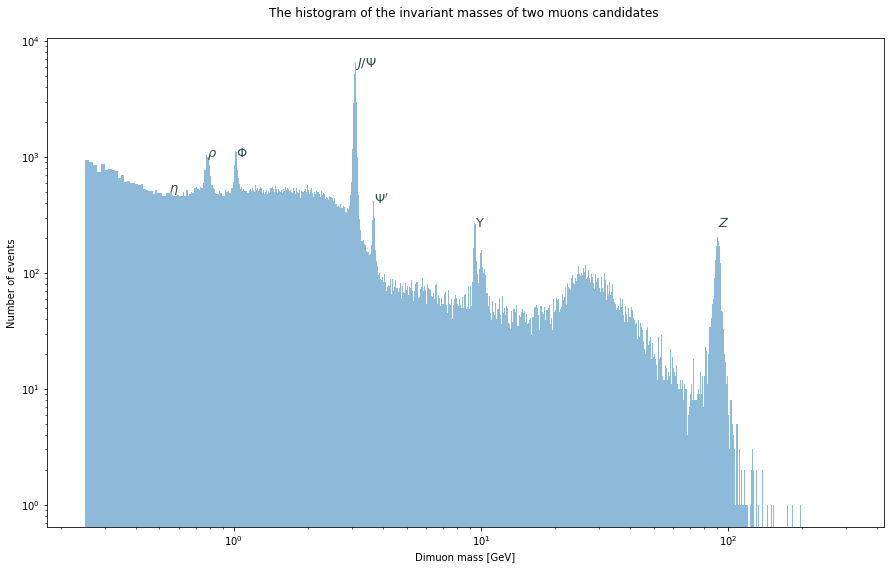

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting the final figure

fig, ax = plt.subplots()
hist2 = a.plot(kind="hist", bins=30000, range=[0.25, 300.0], loglog=True, edgecolor='None', alpha = 0.5)
fig.set_size_inches([15,9])

# Name the axes and give the title.
plt.xlabel('Dimuon mass [GeV]')
plt.ylabel('Number of events')
plt.title('The histogram of the invariant masses of two muons candidates \n') # \n creates a new line for making the title look better

#values taken from Particle Data Group
eta_mass = 547.862 / 1000. #in GeV
phi_mass = 1019.461 / 1000. #in GeV
rho_mass = 775.26 / 1000. #in GeV
jpsi_mass = 3096.900 / 1000. #in GeV
psi_prime_mass = 3686.111 / 1000. #in GeV
upsilon_mass = 9460.30 / 1000. #in GeV
Z_mass = 91.1876 #in GeV

hist2.annotate(r'$\eta$', xy=(eta_mass,500), family='sans-serif', fontsize=13, color='darkslategrey')
hist2.annotate(r'$\rho$', xy=(rho_mass,1000), family='sans-serif', fontsize=13, color='darkslategrey')
hist2.annotate(r'$\Phi$', xy=(phi_mass,1000), family='sans-serif', fontsize=13, color='darkslategrey')
hist2.annotate(r'$J/\Psi$', xy=(jpsi_mass,6000), family='sans-serif', fontsize=13, color='darkslategrey')
hist2.annotate(r'$\Psi^{\prime}$', xy=(psi_prime_mass,400), family='sans-serif', fontsize=13, color='darkslategrey')
hist2.annotate(r'$\Upsilon$', xy=(upsilon_mass,250), family='sans-serif', fontsize=13, color='darkslategrey')
hist2.annotate(r'$Z$', xy=(Z_mass,250), family='sans-serif', fontsize=13, color='darkslategrey')

# Show the plot.
plt.show()
plt.savefig("my_analysis_plot.jpg")
# the plotting style of the histogram wasn't changed much due to the fact that the plotting of the bins for logscale on x-axis doesn't work properly for most of the conventional plotting styles (e.g. for Seaborn)

The original plot for the comparison:

![](http://cds.cern.ch/record/1456510/files/pictures_samples_dimuonSpectrum_40pb-1_mod-combined.png)

The plots are quite similar (the resonanse peaks can be seen in correct places - except for the $\eta$ meson, most likely due to the low statistics applied in this exercise). Other differences are connected to different cuts applied in comparison to the CMS analysis (e.g. we got rid of the events with several muon pairs). For further check, the plot can be remade for larger sample of CMS events.